In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


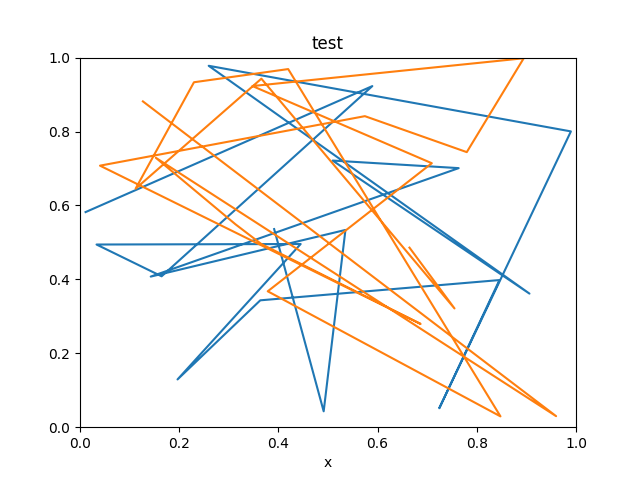

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data1 = np.random.rand(2, 25)
data2 = np.random.rand(2, 25)
l1, = plt.plot([], [])
l2, = plt.plot([], [] )
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani1 = animation.FuncAnimation(fig1, update_line, 25, fargs=(data1, l1),
                                   interval=50, blit=True)
line_ani2 = animation.FuncAnimation(fig1, update_line, 25, fargs=(data2, l2),
                                   interval=50, blit=True)

In [4]:
animation.FuncAnimation?

In [28]:
xx = data_gen()

<IPython.core.display.Javascript object>


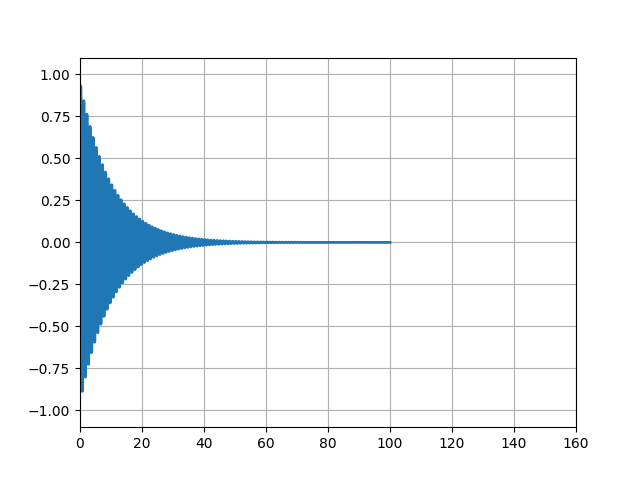

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, repeat=False, init_func=init)
plt.show()

In [30]:
print(xx)

<generator object data_gen at 0x7fb7be0df938>


In [25]:
animation.FuncAnimation??

<IPython.core.display.Javascript object>


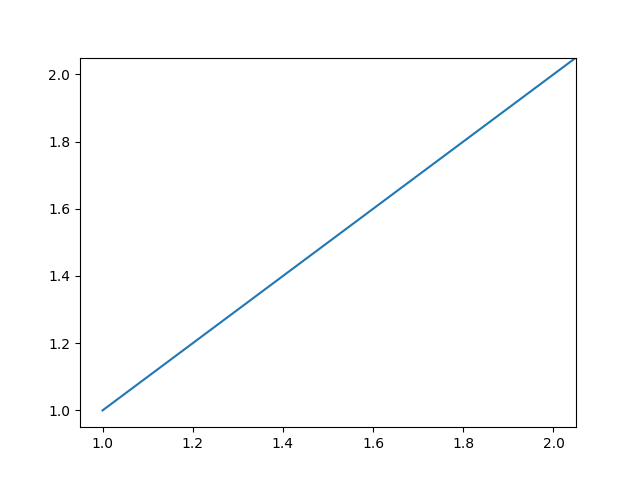

In [11]:
import matplotlib.pyplot as plt
import numpy

hl, = plt.plot([1, 2], [1, 2])

def update_line(hl, new_data):
    hl.set_xdata(numpy.append(hl.get_xdata(), new_data))
    hl.set_ydata(numpy.append(hl.get_ydata(), new_data))
    plt.draw()

In [14]:
update_line(hl, 4)

In [16]:
hl.get_ydata()

array([1, 2, 3, 4])

In [18]:
hl.set_xdata(numpy.append(hl.get_xdata(), 1))
hl.set_ydata(numpy.append(hl.get_ydata(), 3))

In [19]:
    plt.register_cmap

<IPython.core.display.Javascript object>


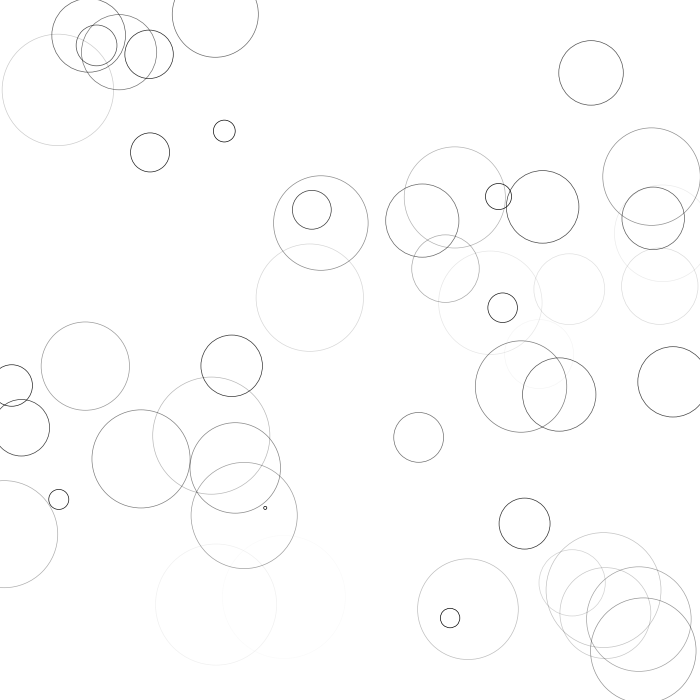

In [31]:
"""
===============
Rain simulation
===============

Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()

<IPython.core.display.Javascript object>


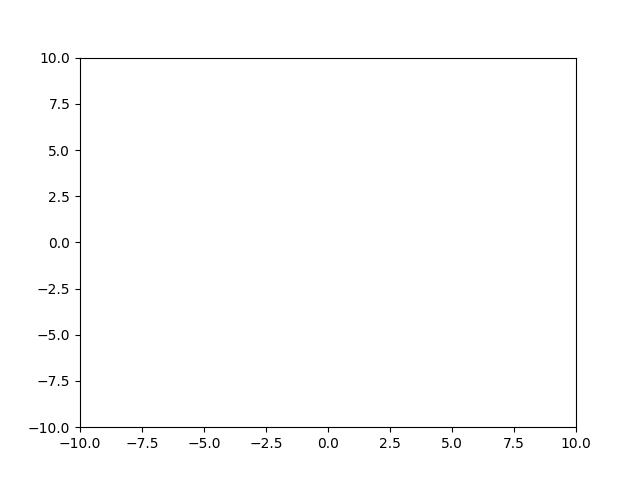

In [33]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                           init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, s, c = next(self.stream)
        self.scat = self.ax.scatter(x, y, c=c, s=s, animated=True)
        self.ax.axis([-10, 10, -10, 10])

        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        data = np.random.random((4, self.numpoints))
        xy = data[:2, :]
        s, c = data[2:, :]
        xy -= 0.5
        xy *= 10
        while True:
            xy += 0.03 * (np.random.random((2, self.numpoints)) - 0.5)
            s += 0.05 * (np.random.random(self.numpoints) - 0.5)
            c += 0.02 * (np.random.random(self.numpoints) - 0.5)
            yield data

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data[:2, :])
        # Set sizes...
        self.scat._sizes = 300 * abs(data[2])**1.5 + 100
        # Set colors..
        self.scat.set_array(data[3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def show(self):
        plt.show()

a = AnimatedScatter()
a.show()

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

def main():
    numframes = 10
    numpoints = 10
    color_data = np.random.random((numframes, numpoints))
    x, y, c = np.random.random((3, numpoints))

    fig = plt.figure()
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=iter(range(numframes)),
                                  fargs=(color_data, scat))
    plt.show()

def update_plot(i, data, scat):
    scat.set_array(data[i])
    return scat,



<IPython.core.display.Javascript object>


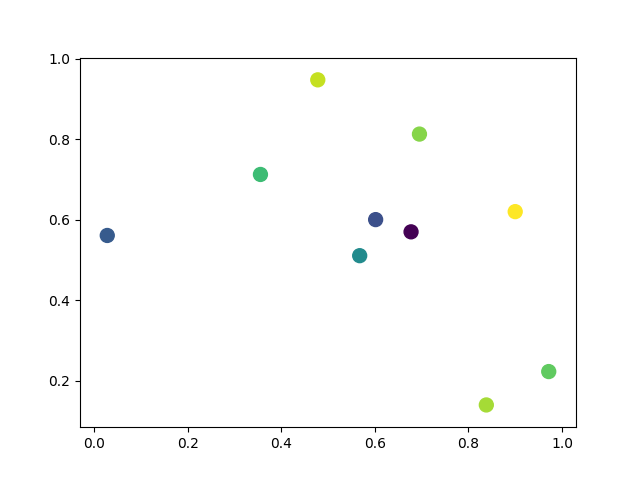

In [46]:
main()

<IPython.core.display.Javascript object>


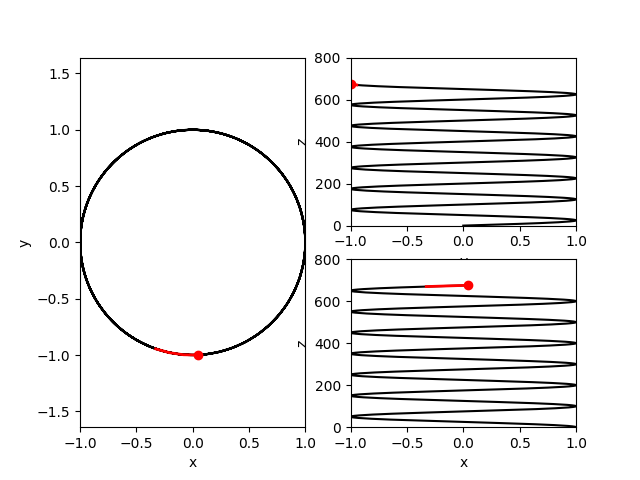

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation


class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)

        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(2 * np.pi * self.t / 10.)
        self.y = np.sin(2 * np.pi * self.t / 10.)
        self.z = 10 * self.t

        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')

        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(0, 800)

        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(0, 800)

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])

        self.line2.set_data(self.y[:i], self.z[:i])
        self.line2a.set_data(self.y[head_slice], self.z[head_slice])
        self.line2e.set_data(self.y[head], self.z[head])

        self.line3.set_data(self.x[:i], self.z[:i])
        self.line3a.set_data(self.x[head_slice], self.z[head_slice])
        self.line3e.set_data(self.x[head], self.z[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
# ani.save('test_sub.mp4')
plt.show()

In [1]:
from influxdb import InfluxDBClient


def main(host='localhost', port=8086):
    user = 'root'
    password = 'root'
    dbname = 'example'
    dbuser = 'smly'
    dbuser_password = 'my_secret_password'
    query = 'select value from cpu_load_short;'
    json_body = [
        {
            "measurement": "cpu_load_short",
            "tags": {
                "host": "server01",
                "region": "us-west"
            },
            "time": "2009-11-10T23:00:00Z",
            "fields": {
                "Float_value": 0.64,
                "Int_value": 3,
                "String_value": "Text",
                "Bool_value": True
            }
        }
    ]

    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create database: " + dbname)
    client.create_database(dbname)

    print("Create a retention policy")
    client.create_retention_policy('awesome_policy', '3d', 3, default=True)

    print("Switch user: " + dbuser)
    client.switch_user(dbuser, dbuser_password)

    print("Write points: {0}".format(json_body))
    client.write_points(json_body)

    print("Queying data: " + query)
    result = client.query(query)

    print("Result: {0}".format(result))

    print("Switch user: " + user)
    client.switch_user(user, password)

    print("Drop database: " + dbname)
    client.drop_database(dbname)


In [4]:
main('183.136.205.102', 38086)

Create database: example
Create a retention policy
Switch user: smly
Write points: [{'measurement': 'cpu_load_short', 'time': '2009-11-10T23:00:00Z', 'tags': {'region': 'us-west', 'host': 'server01'}, 'fields': {'String_value': 'Text', 'Float_value': 0.64, 'Bool_value': True, 'Int_value': 3}}]


InfluxDBClientError: 400: {"error":"partial write: points beyond retention policy dropped=1"}
